In [4]:
img_rows = 64
img_cols = 64
color_type = 1
batch_size = 60
nb_epoch = 15
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

In [5]:
def vgg_std16_model(img_rows, img_cols, color_type=3):
    nb_classes = 10
    vgg16_model = VGG16(weights="imagenet", include_top=False)

    for layer in vgg16_model.layers:
        layer.trainable = False
        
    x = vgg16_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(nb_classes, activation = 'softmax')(x)

    model = Model(inputs = vgg16_model.input, outputs  = predictions)
    
    return model

In [6]:
model_vgg16 = vgg_std16_model(img_rows, img_cols)
model_vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [6]:
import cv2
direccion = 'conductor/imgs/test/img_4.jpg'
imagen = cv2.imread(direccion,0)
cv2.imshow('imagen', imagen)
cv2.imwrite('grises.jpg', imagen)
cv2.waitKey(1000)
cv2.destroyAllWindows()

In [7]:
!dir

 El volumen de la unidad C es Windows
 El n�mero de serie del volumen es: EC60-DDC5

 Directorio de c:\Users\HP\Desktop\items\proyecto

09/07/2022  21:47    <DIR>          .
07/07/2022  18:00    <DIR>          ..
09/07/2022  15:06    <DIR>          app_ia33
28/06/2022  01:07    <DIR>          conductor
04/07/2022  19:33        61.009.464 conductor.tflite
06/07/2022  16:34            72.922 grises.jpg
22/06/2022  09:07             2.479 h.html
22/06/2022  09:17             1.195 hv1.html
29/06/2022  23:30             2.391 hv2.html
08/07/2022  21:01    <DIR>          ia3_app
01/07/2022  10:23             2.325 index.html
01/07/2022  20:23         9.306.887 input_video.mp4
09/07/2022  21:49           177.242 main.ipynb
09/07/2022  21:47        63.230.752 malaria_model_100epochs.h5
26/06/2022  13:24        63.230.720 weights_best_vgg16.hdf5
01/07/2022  17:17        67.371.648 weights_best_vgg16_1.hdf5
01/07/2022  20:14        63.230.752 weights_best_vgg16_2.hdf5
              12 archivos 

In [8]:
model_vgg16.load_weights('malaria_model_100epochs.h5')

In [9]:
activity_map = {'c0': 'Conduccion segura', 
                'c1': 'uso de celular ->', 
                'c2': 'uso de celular ->', 
                'c3': 'uso de celular <-', 
                'c4': 'uso de celular <-', 
                'c5': 'Urgar la radio', 
                'c6': 'bebiendo', 
                'c7': 'Mirar detras', 
                'c8': 'Tocandose el pelo', 
                'c9': 'Hablando con el pasajero'
                }

In [10]:
def plot_vgg16_test_class(model, imagen):
    img_brute = imagen

    im = cv2.resize(cv2.cvtColor(img_brute, cv2.COLOR_BGR2RGB), (img_rows,img_cols)).astype(np.float32) / 255.0
    im = np.expand_dims(im, axis =0)

    img_display = cv2.resize(img_brute,(img_rows,img_cols))
    plt.imshow(img_display, cmap='gray')

    y_preds = model.predict(im, batch_size=batch_size, verbose=1)
    # print(y_preds)
    y_prediction = np.argmax(y_preds)
    label = activity_map.get('c{}'.format(y_prediction))
    # print('Y Prediction: {}'.format(y_prediction))
    # print('Predicted as: {}'.format(label))
    
    # plt.show()
    return label

In [11]:
import numpy as np
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 273ms/step
[[8.5771344e-06 2.9355364e-05 2.4155518e-03 6.7675785e-08 7.1203620e-05
  8.1133338e-05 4.4577578e-01 1.9381324e-02 3.5795216e-02 4.9644184e-01]]


'Hablando con el pasajero'

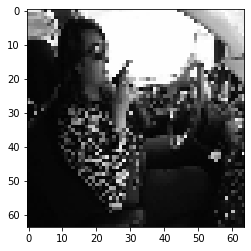

In [12]:
plot_vgg16_test_class(model_vgg16, imagen)

1/1 [==============================] - 0s 27ms/step


AttributeError: 'NoneType' object has no attribute 'release'

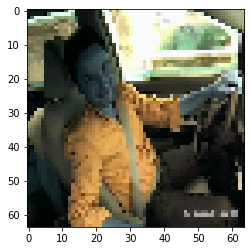

In [12]:
import numpy as np
import cv2

cap = cv2.VideoCapture('input_video.mp4') 
writer = None
(W, H) = (None, None)

while(True):
  (ret, frame) = cap.read() 
  if not ret:
    break
  # if W is None or H is None:
  #   (H, W) = frame.shape[:2]
  
  
  label = plot_vgg16_test_class(model_vgg16, frame)
  text = label
  # if label != 'Conducción segura':
  #   text = 'Conduccion correcta'
  # text = 'Conduccion incorrecta'
  cv2.putText(frame, text, (35, 50), cv2.FONT_HERSHEY_SIMPLEX,
		1.25, (0, 255, 0), 5)

  cv2.imshow('img',frame) 
  if cv2.waitKey(1) & 0xFF == ord("y"): 
    #cv2.imwrite("images/c1.png",frame)
    #cv2.destroyAllWindows()
    break

writer.release()
cap.release()

In [14]:
INPUT_VIDEO_FILE = "input_video.mp4"
OUTPUT_VIDEO_FILE = "output.mp4"

vs = cv2.VideoCapture(INPUT_VIDEO_FILE)
writer = None
(W, H) = (None, None)
# loop over frames from the video file stream
while True:
	# read the next frame from the file
	(grabbed, frame) = vs.read()

	if not grabbed:
		break
	if W is None or H is None:
		(H, W) = frame.shape[:2]

	output = frame.copy()
	frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
	frame = cv2.resize(frame, (128, 128), cv2.INTER_AREA)
	# frame -= mean
	frame = np.expand_dims(frame,axis=0).astype('float32')/255 - 0.5

	# make predictions on the frame and then update the predictions
	# queue
	label = plot_vgg16_test_class(model_vgg16, frame)

	text = "activity: {}".format(label)
	cv2.putText(output, text, (35, 50), cv2.FONT_HERSHEY_SIMPLEX,
		1.25, (0, 255, 0), 5)
	# check if the video writer is None
	if writer is None:
		# initialize our video writer
		fourcc = cv2.VideoWriter_fourcc(*"MJPG")
		writer = cv2.VideoWriter(OUTPUT_VIDEO_FILE, fourcc, 30,
			(W, H), True)
		
	# write the output frame to disk
	writer.write(output)
	# show the output image
	cv2.imshow("Output", output)
	key = cv2.waitKey(1) & 0xFF
	# if the `q` key was pressed, break from the loop
	if key == ord("q"):
		break
# release the file pointers
print("[INFO] cleaning up...")
writer.release()
vs.release()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:3689: error: (-215:Assertion failed) !dsize.empty() in function 'cv::hal::resize'
